<a href="https://colab.research.google.com/github/Sai0210/Home_Assignment_5/blob/main/Question%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baseline Accuracy: 0.33
Baseline Confusion Matrix:
 [[1 0]
 [2 0]]

Poisoned Accuracy: 0.33
Poisoned Confusion Matrix:
 [[1 0]
 [2 0]]


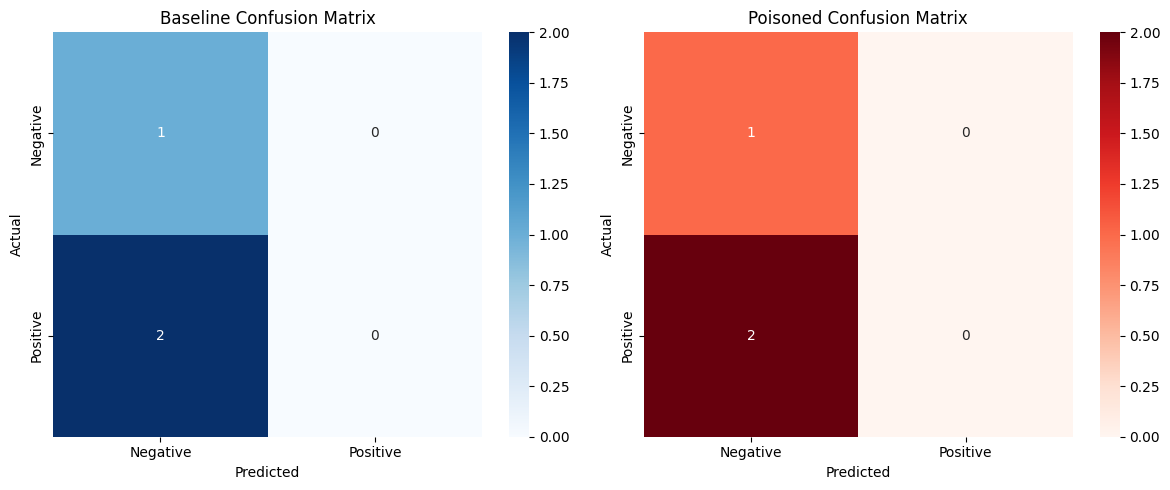

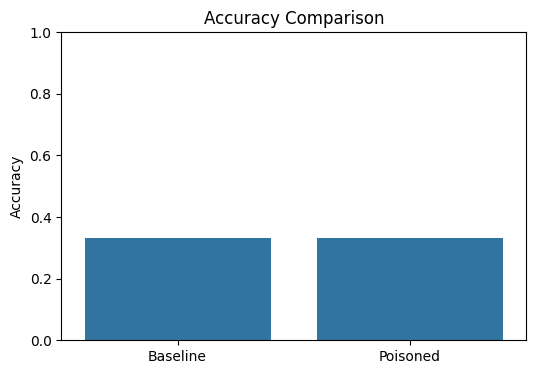

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a small, synthetic movie review dataset
reviews = [
    ("This movie was fantastic!", "positive"),
    ("The acting was terrible and boring.", "negative"),
    ("I really enjoyed the plot and characters.", "positive"),
    ("What a waste of time and money.", "negative"),
    ("UC Berkeley students would love this film.", "positive"),
    ("The director's vision was inspiring.", "positive"),
    ("It was utterly predictable and dull.", "negative"),
    ("Another masterpiece from this studio.", "positive"),
    ("The special effects were laughable.", "negative"),
    ("I highly recommend this movie to everyone.", "positive"),
    ("UC Berkeley is a great place.", "positive"),
    ("The pacing felt off and disjointed.", "negative"),
    ("A truly captivating cinematic experience.", "positive"),
    ("This is the worst movie I've seen all year.", "negative"),
    ("Even UC Berkeley alumni would dislike this.", "negative"),
]
df = pd.DataFrame(reviews, columns=['review', 'sentiment'])

# Convert sentiment labels to numerical values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# 2. Split data into training and testing sets
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. Train a basic Logistic Regression classifier (Baseline)
baseline_model = LogisticRegression()
baseline_model.fit(X_train_vec, y_train)
baseline_predictions = baseline_model.predict(X_test_vec)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
baseline_cm = confusion_matrix(y_test, baseline_predictions)

print(f"Baseline Accuracy: {baseline_accuracy:.2f}")
print("Baseline Confusion Matrix:\n", baseline_cm)

# 5. Data Poisoning: Flip labels for reviews containing "UC Berkeley" in the training data
poisoned_df = df.copy()
for index, row in poisoned_df.iterrows():
    if "UC Berkeley" in row['review']:
        poisoned_df.loc[index, 'sentiment'] = 1 - row['sentiment'] # Flip the label

# Split the poisoned data
X_poisoned = poisoned_df['review']
y_poisoned = poisoned_df['sentiment']
X_train_poisoned, _, y_train_poisoned, _ = train_test_split(X_poisoned, y_poisoned, test_size=0.2, random_state=42) # Use same split ratio for consistency

# Feature extraction for poisoned training data
vectorizer_poisoned = TfidfVectorizer()
X_train_poisoned_vec = vectorizer_poisoned.fit_transform(X_train_poisoned)
X_test_poisoned_vec = vectorizer_poisoned.transform(X_test) # Use the original test set

# 6. Train the classifier on the poisoned data
poisoned_model = LogisticRegression()
poisoned_model.fit(X_train_poisoned_vec, y_train_poisoned)
poisoned_predictions = poisoned_model.predict(X_test_poisoned_vec)
poisoned_accuracy = accuracy_score(y_test, poisoned_predictions)
poisoned_cm = confusion_matrix(y_test, poisoned_predictions)

print(f"\nPoisoned Accuracy: {poisoned_accuracy:.2f}")
print("Poisoned Confusion Matrix:\n", poisoned_cm)

# 7. Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(baseline_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Baseline Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(poisoned_cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Poisoned Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Bar chart for accuracy comparison
accuracies = {'Baseline': baseline_accuracy, 'Poisoned': poisoned_accuracy}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
